In [ ]:
    from netCDF4 import Dataset
    import numpy as np
    nc_file = Dataset('/home/mxi235/data/CBA_full/boussinesq.nc', 'r')

In [42]:
from netCDF4 import Dataset
import numpy as np

# 读取 NetCDF 数据
nc = Dataset('/home/mxi235/data/CBA_full/boussinesq.nc', "r")

# 读取 u, v
u = nc.variables['u'][:]
v = nc.variables['v'][:]
print(u.shape, v.shape)  # 输出形状确认

# # transpose u 和 v
# u = np.transpose(u, (2,1,0))  # 转换
# v = np.transpose(v, (2,1,0))  # 转换
# print(u.shape, v.shape)  # 输出形状确认

nc.close()

# 转为 float32，填补缺失值（如果有）
u_filled = u.filled(0).astype(np.float32) if np.ma.isMaskedArray(u) else u.astype(np.float32)
v_filled = v.filled(0).astype(np.float32) if np.ma.isMaskedArray(v) else v.astype(np.float32)
print(u_filled.shape, v_filled.shape)  # 输出形状确认

# # 写入二进制文件
u_filled.tofile("/home/mxi235/data/CBA_full/u.bin")
v_filled.tofile("/home/mxi235/data/CBA_full/v.bin")




(2001, 450, 150) (2001, 450, 150)
(2001, 450, 150) (2001, 450, 150)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#read data
data_u = np.fromfile("/home/mxi235/data/CBA_full/u.bin", dtype=np.float32).reshape((2001,450,150))
data_v = np.fromfile("/home/mxi235/data/CBA_full/v.bin", dtype=np.float32).reshape((2001,450,150))

# 选择时间步
time_step = 1000  # 选择第 1000 个时间步
u_slice = data_u[time_step, :, :]  # 选择 u 的第 1000 个时间步
v_slice = data_v[time_step, :, :]  # 选择 v 的第 1000 个时间步
magnitude = np.sqrt(u_slice**2 + v_slice**2)





(450, 150) (450, 150) (450, 150)


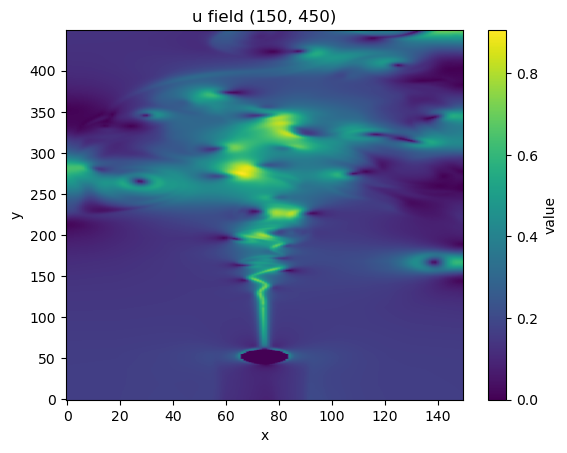

In [6]:
print(u_slice.shape, v_slice.shape, magnitude.shape)
plt.imshow(magnitude, origin='lower', aspect='auto')
plt.colorbar(label='value')
plt.title("u field (150, 450)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
#process Cylinder Flow with von Karman Vortex Street dataset

from netCDF4 import Dataset
import numpy as np

# 读取 NetCDF 数据
nc = Dataset('/home/mxi235/data/2d_vortex_street_640_80_1501/cylinder2d.nc', "r")
nc.set_auto_mask(False)    
# 读取 u, v
u = nc.variables['u'][:]
v = nc.variables['v'][:]
print(u.shape, v.shape)  # 输出形状确认

# #convert to float32
u = u.astype(np.float32)
v = v.astype(np.float32)

# # 写入二进制文件
u.tofile("/home/mxi235/data/2d_vortex_street_640_80_1501/u.bin")
v.tofile("/home/mxi235/data/2d_vortex_street_640_80_1501/v.bin")

nc.close()


(1501, 80, 640) (1501, 80, 640)


(80, 640) (80, 640) (80, 640)


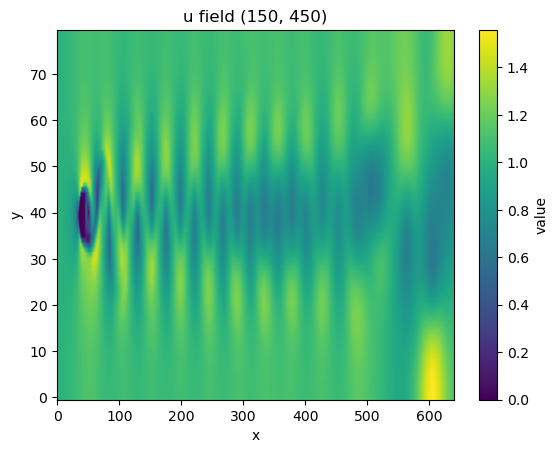

In [13]:
import matplotlib.pyplot as plt

#read data
data_u = np.fromfile("/home/mxi235/data/2d_vortex_street_640_80_1501/u.bin", dtype=np.float32).reshape((1501,80,640))
data_v = np.fromfile("/home/mxi235/data/2d_vortex_street_640_80_1501/v.bin", dtype=np.float32).reshape((1501,80,640))

# 选择时间步
time_step = 1000  # 选择第 1000 个时间步
u_slice = data_u[time_step, :, :]  # 选择 u 的第 1000 个时间步
v_slice = data_v[time_step, :, :]  # 选择 v 的第 1000 个时间步
#write 1000th slice to binary file
u_slice.tofile("/home/mxi235/data/2d_vortex_street_640_80_1501/u_1000.bin")
v_slice.tofile("/home/mxi235/data/2d_vortex_street_640_80_1501/v_1000.bin")
magnitude = np.sqrt(u_slice**2 + v_slice**2)
print(u_slice.shape, v_slice.shape, magnitude.shape)
plt.imshow(magnitude, origin='lower', aspect='auto')
plt.colorbar(label='value')
plt.title("u field (150, 450)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [2]:
# cylinderFlowSynthetic data
from netCDF4 import Dataset
import numpy as np

# 读取 NetCDF 数据
nc = Dataset('/home/mxi235/data/CylinderFlowSynthetic_450_200_500/CylinderFlowSynthetic_450_200_500.nc', "r")
nc.set_auto_mask(False)    
# 读取 u, v
u = nc.variables['u'][:]
v = nc.variables['v'][:]
print(u.shape, v.shape)  # 输出形状确认

# #convert to float32
u = u.astype(np.float32)
v = v.astype(np.float32)

# # 写入二进制文件
u.tofile("/home/mxi235/data/CylinderFlowSynthetic_450_200_500/u.bin")
v.tofile("/home/mxi235/data/CylinderFlowSynthetic_450_200_500/v.bin")

nc.close()


(500, 200, 450) (500, 200, 450)


(500, 200, 450) (500, 200, 450)
(200, 450) (200, 450) (200, 450)


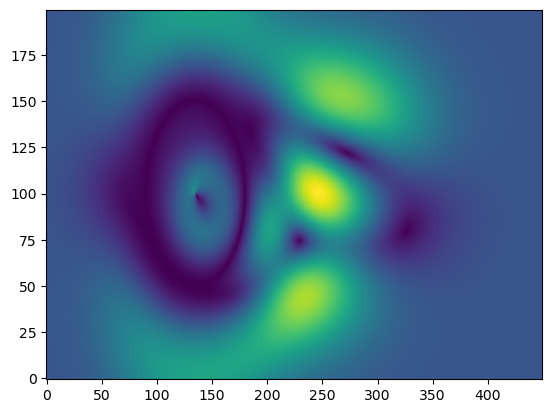

In [3]:
import matplotlib.pyplot as plt

#read data
data_u = np.fromfile("/home/mxi235/data/CylinderFlowSynthetic_450_200_500/u.bin", dtype=np.float32).reshape((500,200,450))
data_v = np.fromfile("/home/mxi235/data/CylinderFlowSynthetic_450_200_500/v.bin", dtype=np.float32).reshape((500,200,450))
print(data_u.shape, data_v.shape)

# 选择时间步
time_step = 100  # 选择第 100 个时间步
u_slice = data_u[time_step, :, :]  # 选择 u 的第
v_slice = data_v[time_step, :, :]  # 选择 v 的第 100 个时间步
#write 1000th slice to binary file
u_slice.tofile("/home/mxi235/data/CylinderFlowSynthetic_450_200_500/u_100.bin")
v_slice.tofile("/home/mxi235/data/CylinderFlowSynthetic_450_200_500/v_100.bin")
magnitude = np.sqrt(u_slice**2 + v_slice**2)
print(u_slice.shape, v_slice.shape, magnitude.shape)
plt.imshow(magnitude, origin='lower', aspect='auto')
plt.show()

In [3]:
# cylinderCorner dataset
from netCDF4 import Dataset
import numpy as np
# 读取 NetCDF 数据
nc = Dataset('/home/mxi235/data/cylinderCorner_450_150_1501/pipedcylinder2d.nc', "r")
nc.set_auto_mask(False)
# 读取 u, v
u = nc.variables['u'][:]
v = nc.variables['v'][:]
print(u.shape, v.shape)  # 输出形状确认

# #convert to float32
u = u.astype(np.float32)
v = v.astype(np.float32)
# # 写入二进制文件
u.tofile("/home/mxi235/data/cylinderCorner_450_150_1501/u.bin")
v.tofile("/home/mxi235/data/cylinderCorner_450_150_1501/v.bin")
nc.close()


(1501, 150, 450) (1501, 150, 450)


(1501, 150, 450) (1501, 150, 450)
(150, 450) (150, 450) (150, 450)


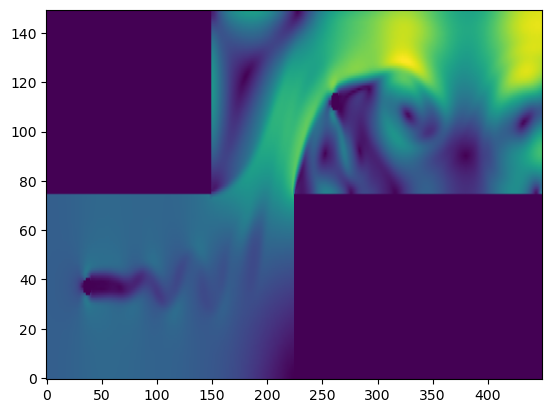

In [4]:
import matplotlib.pyplot as plt
#read data
data_u = np.fromfile("/home/mxi235/data/cylinderCorner_450_150_1501/u.bin", dtype=np.float32).reshape((1501,150,450))
data_v = np.fromfile("/home/mxi235/data/cylinderCorner_450_150_1501/v.bin", dtype=np.float32).reshape((1501,150,450))
print(data_u.shape, data_v.shape)
# 选择时间步
time_step = 1000  # 选择第 1000 个时间步
u_slice = data_u[time_step, :, :]  # 选择 u 的第
v_slice = data_v[time_step, :, :]  # 选择 v 的第 1000 个时间步
#write 1000th slice to binary file
u_slice.tofile("/home/mxi235/data/cylinderCorner_450_150_1501/u_1000.bin")
v_slice.tofile("/home/mxi235/data/cylinderCorner_450_150_1501/v_1000.bin")
magnitude = np.sqrt(u_slice**2 + v_slice**2)
print(u_slice.shape, v_slice.shape, magnitude.shape)
plt.imshow(magnitude, origin='lower', aspect='auto')
plt.show()

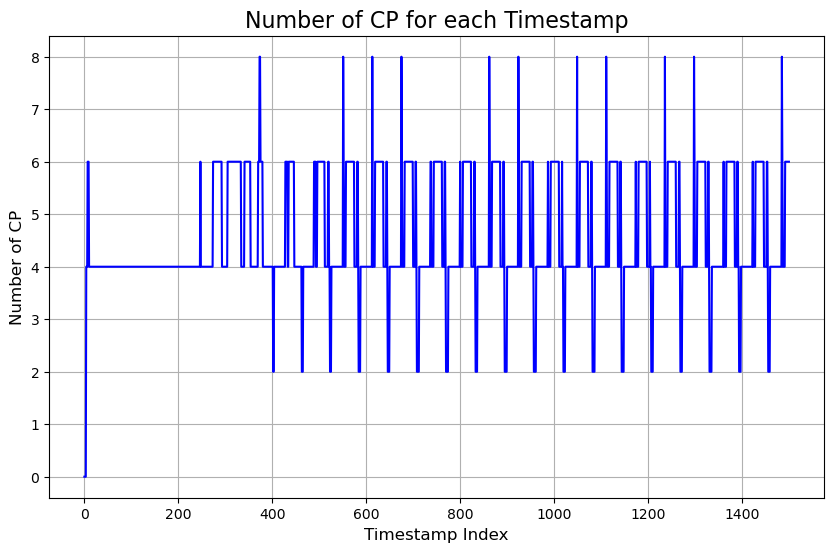

In [1]:
import matplotlib.pyplot as plt

def plot_line_chart_from_file(file_path):
    """
    从一个每行只有一个数字的文件中读取数据，并绘制折线图。

    Args:
        file_path (str): 包含数字数据的文件路径。
    """
    # 用于存储从文件中读取的数字
    numbers = []

    try:
        # 打开文件并逐行读取
        with open(file_path, 'r') as file:
            for line in file:
                # 尝试将每行文本转换为浮点数，并添加到列表中
                try:
                    number = float(line.strip())
                    numbers.append(number)
                except ValueError:
                    print(f"Warning: Skipping invalid line '{line.strip()}' in the file.")
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return

    # 检查是否成功读取到数据
    if not numbers:
        print("Error: No valid numbers were found in the file.")
        return

    # 绘制折线图
    plt.figure(figsize=(10, 6))  # 设置图表尺寸
    plt.plot(numbers, marker=None, linestyle='-', color='b')

    # 添加标题和标签，使图表更具可读性
    plt.title('Number of CP for each Timestamp', fontsize=16)
    plt.xlabel('Timestamp Index', fontsize=12)
    plt.ylabel('Number of CP', fontsize=12)
    plt.grid(True)  # 添加网格线

    # 显示图表
    plt.show()

plot_line_chart_from_file('./640x80x1501') #Cylinder Flow with von Karman Vortex Street


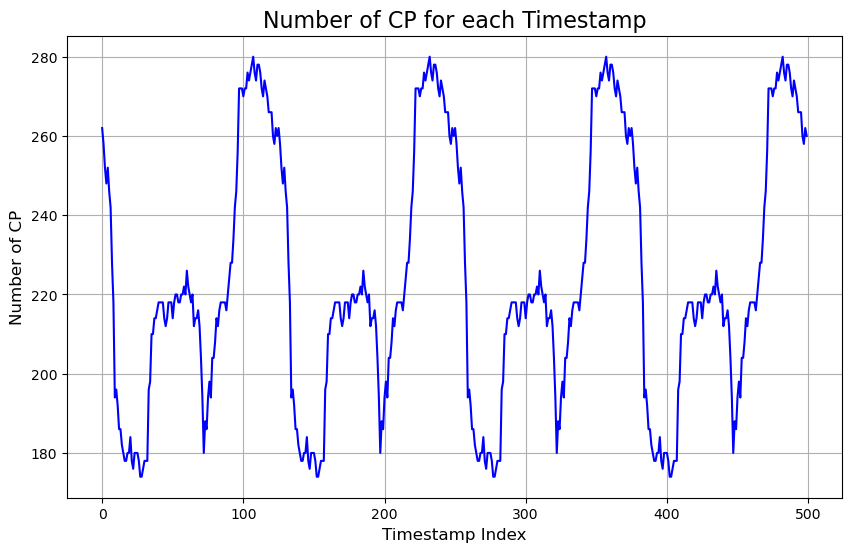

In [2]:
plot_line_chart_from_file("./450x200x500") #Cylinder Flow Synthetic


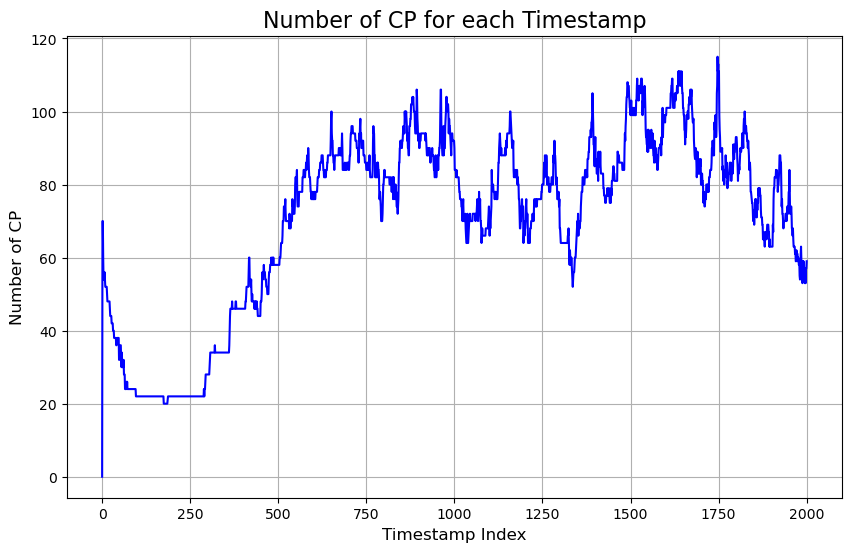

In [3]:
plot_line_chart_from_file("./450x150x2001") #CBA_full

In [3]:
# 给定一个3x3矩阵，计算其行列式
'''
  vertices (t,i,j) and U/V (ori | dec):
    v0 @ (t=93, i=125, j=174)  U: 0.000032203 | 0.000028849   V: -0.000050998 | -0.000053525   U_fp: 270 | 242   V_fp: -428 | -449
    v1 @ (t=94, i=125, j=174)  U: -0.000508788 | -0.000509381   V: 0.000890166 | 0.000890851   U_fp: -4268 | -4273   V_fp: 7467 | 7473
    v2 @ (t=94, i=126, j=175)  U: 0.004282490 | 0.004293680   V: 0.006144817 | 0.006157041   U_fp: 35924 | 36018   V_fp: 51546 | 51649
'''
import numpy as np
matrix_ori = np.array([[0.000032203, -0.000050998, 1], [-0.000508788, 0.000890166, 1], [0.004282490, 0.006144817, 1]])
determinant = np.linalg.det(matrix_ori)
print("Determinant:", determinant)

matrix_dec = np.array([[0.000028849, -0.000053525, 1], [-0.000509381, 0.000890851, 1], [0.004293680, 0.006157041, 1]])
determinant_dec = np.linalg.det(matrix_dec)
print("Determinant_dec:", determinant_dec)

'''
  vertices (t,i,j) and U/V (ori | dec):
    v0 @ (t=93, i=124, j=174)  U: 0.004365620 | 0.004365444   V: -0.006055778 | -0.006054997   U_fp: 36621 | 36620   V_fp: -50800 | -50793
    v1 @ (t=93, i=125, j=174)  U: 0.000032203 | 0.000028849   V: -0.000050998 | -0.000053525   U_fp: 270 | 242   V_fp: -428 | -449
    v2 @ (t=94, i=125, j=174)  U: -0.000508788 | -0.000509381   V: 0.000890166 | 0.000890851   U_fp: -4268 | -4273   V_fp: 7467 | 7473
'''
matrix_ori_2 = np.array([[0.004365620, -0.006055778, 1], [0.000032203, -0.000050998, 1], [-0.000508788, 0.000890166, 1]])
determinant_2 = np.linalg.det(matrix_ori_2)
print("Determinant_2:", determinant_2)
matrix_dec_2 = np.array([[0.004365444, -0.006054997, 1], [0.000028849, -0.000053525, 1], [-0.000509381, 0.000890851, 1]])
determinant_dec_2 = np.linalg.det(matrix_dec_2)
print("Determinant_dec_2:", determinant_dec_2)



Determinant: -7.352097266732994e-06
Determinant_dec: -7.370316978635987e-06
Determinant_2: -8.299241404079978e-07
Determinant_dec_2: -8.652039651599986e-07
